In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grid = np.linspace(0,1,51)

In [3]:
startarr = np.zeros(10000) 
startarr += 0.5

#try half as many steps for 1 dimension compared to 2?
steps=5000
s_inc = 0.02
#1d stuff
basisvects = np.array([-s_inc,+s_inc])

#steps in out walk for now

#boundaries for folding in
boundaries = np.array([0, 1])
csize = np.diff(boundaries, axis=0).ravel()

numpts= int((startarr.size)) #size counts both columns of our x,y matrix

summarr=np.swapaxes(np.cumsum(basisvects[np.random.randint(0,int(basisvects.size),size=(numpts,steps))],axis=1),1,0) #this might have to be axis=1 now
print('now fold into circle')
print(summarr.shape)
#this works
#print(summarr + startarr -boundaries[0] + csize)

trajectory_fold = np.abs((summarr + startarr - boundaries[0] + csize) % (2 * csize) - csize) + boundaries[0]
print('trajectory fold shape')
print(np.shape(trajectory_fold))
#print(trajectory_fold)


#trialax.plot(trajectory_)

now fold into circle
(5000, 10000)
trajectory fold shape
(5000, 10000)


### View some sample 1D paths

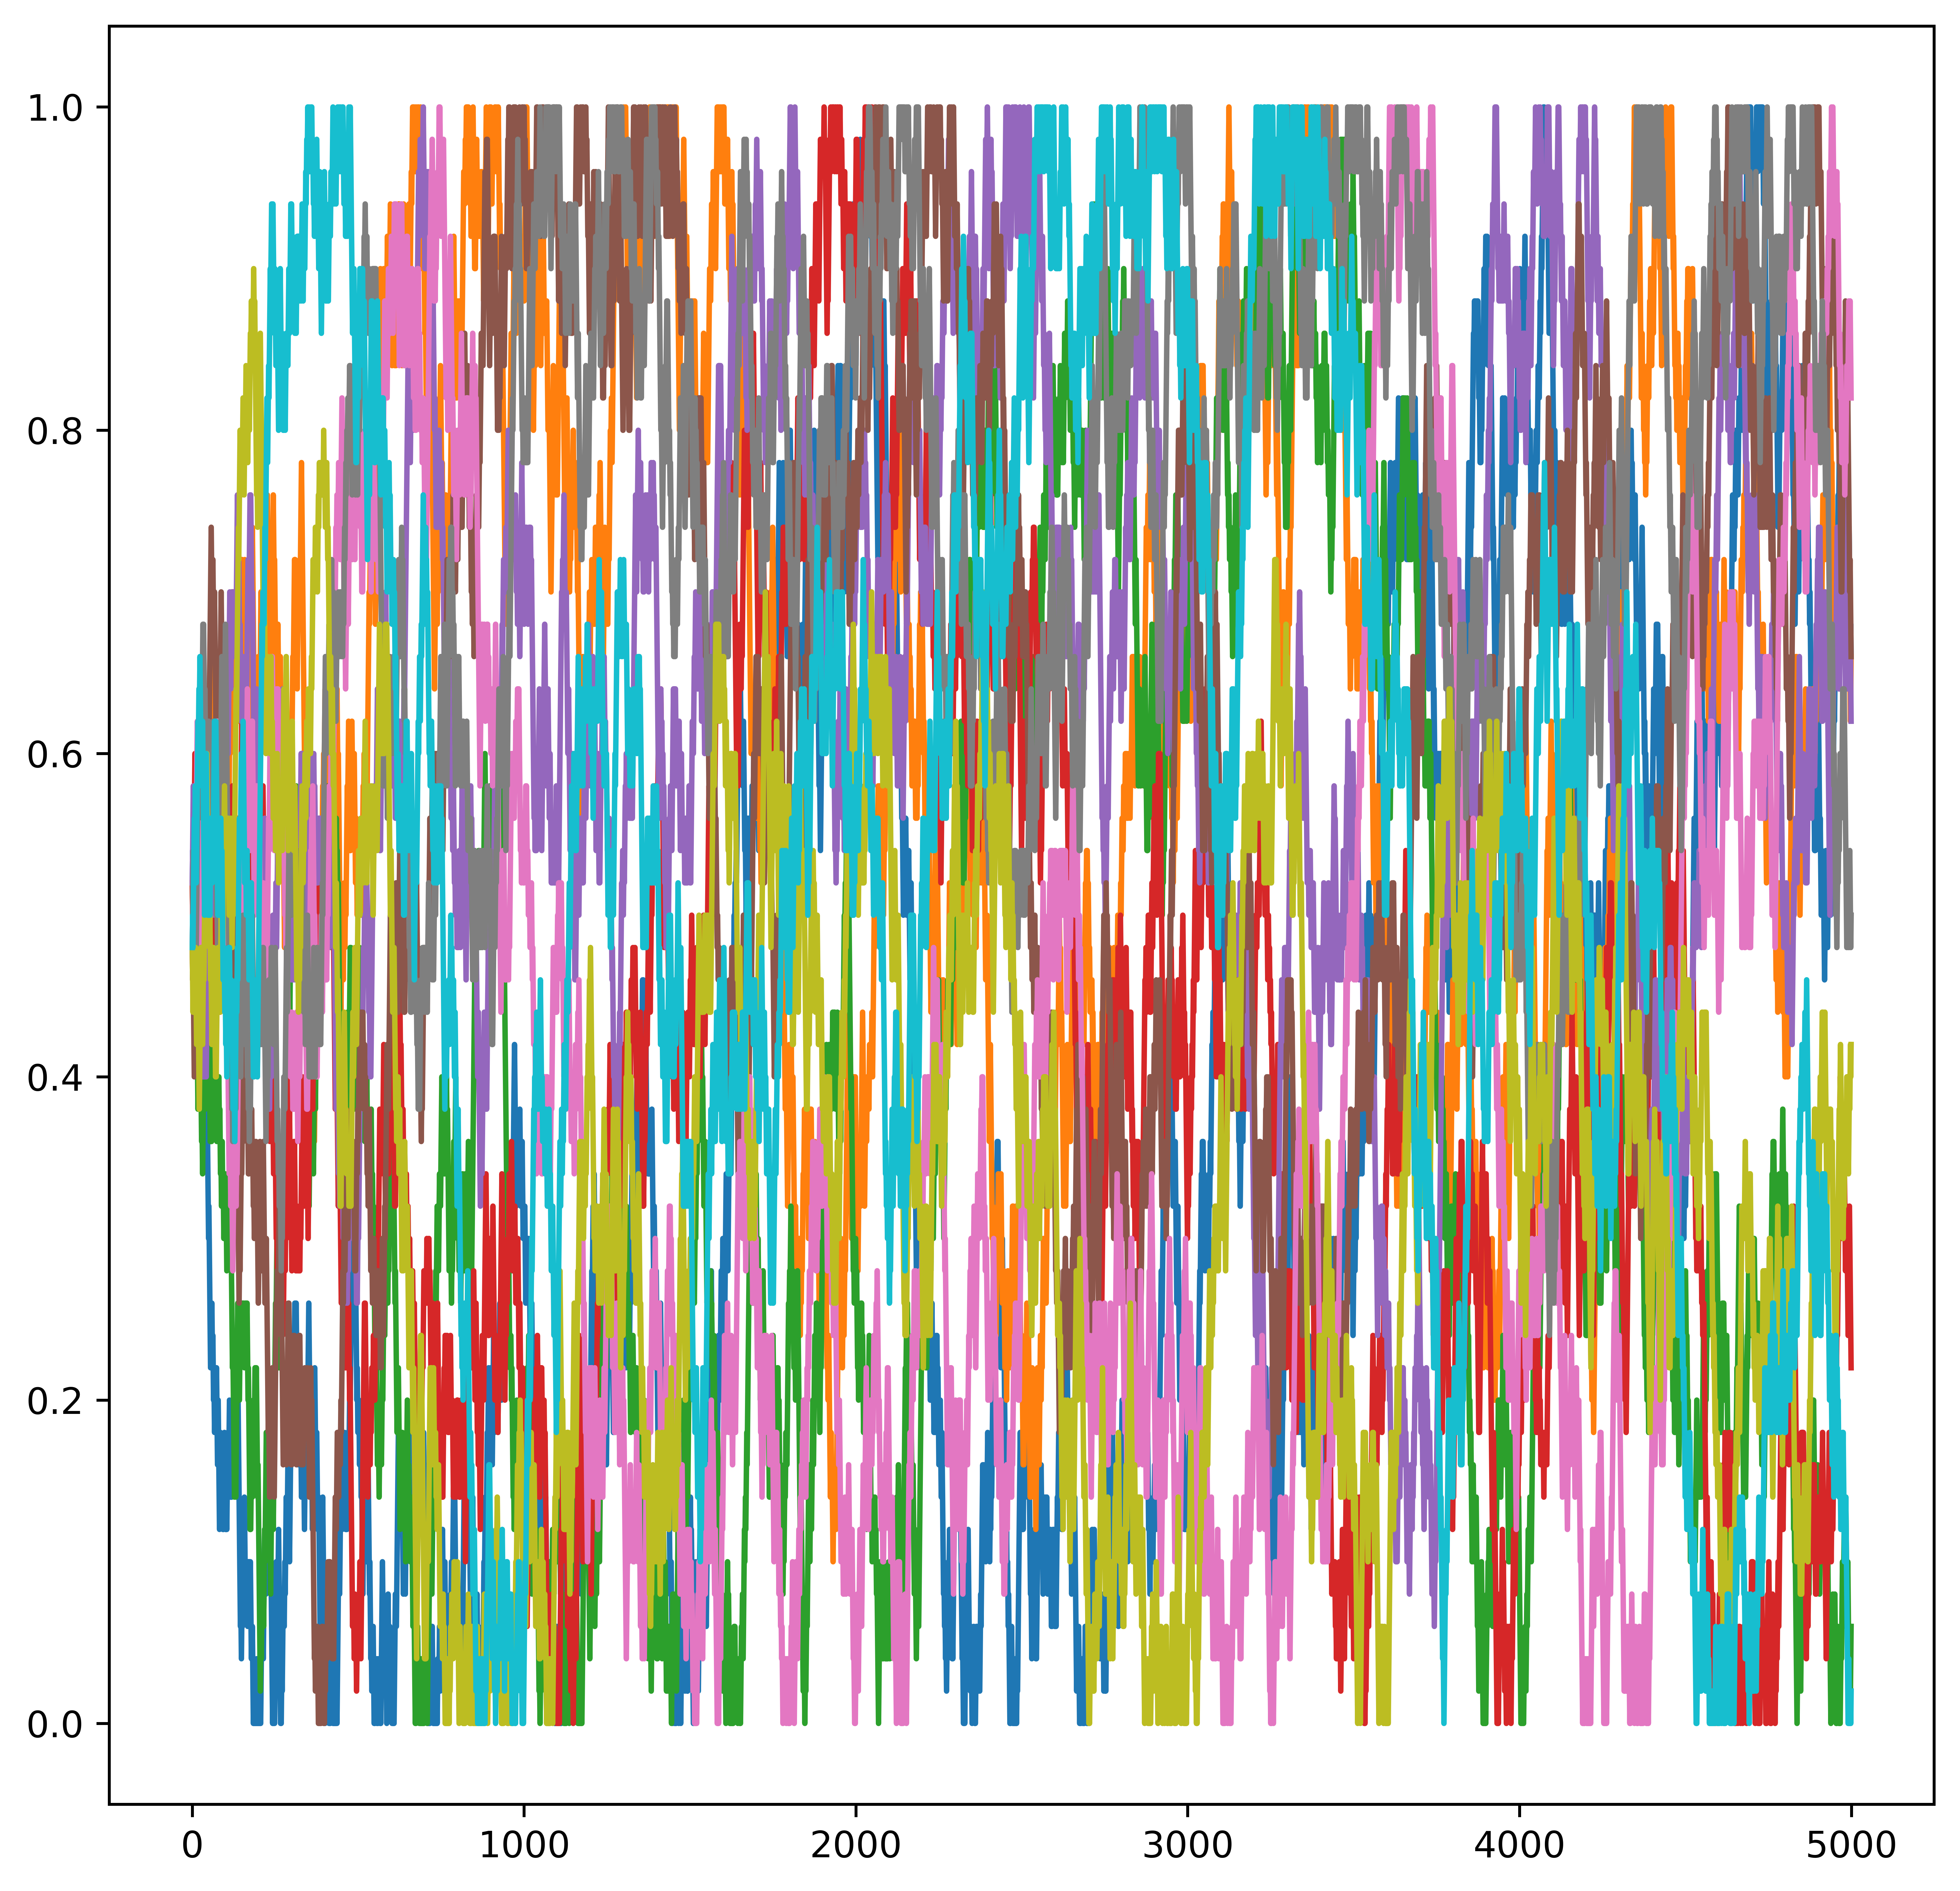

In [4]:
newfig = plt.figure(figsize=(9,9),dpi=900)
axs = plt.axes()
length = int(np.size(trajectory_fold[:,0]))
for i in range(10):
    axs.plot(range(0,length),trajectory_fold[:,i])
plt.show()

### Using splitting (non-reactive) probability q = 0.9

In [5]:
from tracemalloc import start
from turtle import st


def figure_rw(start_pos = float,inq = float):
    startarr = np.zeros(10000) 
    startarr += start_pos

    #try half as many steps for 1 dimension compared to 2?
    steps=30000
    s_inc = 0.02
    #1d stuff
    basisvects = np.array([-s_inc,+s_inc])

    #steps in out walk for now

    #boundaries for folding in
    boundaries = np.array([0, 1])
    csize = np.diff(boundaries, axis=0).ravel()

    numpts= int((startarr.size)) #size counts both columns of our x,y matrix

    summarr=np.swapaxes(np.cumsum(basisvects[np.random.randint(0,int(basisvects.size),size=(numpts,steps))],axis=1),1,0) #this might have to be axis=1 now
    #print('now fold into circle')
    #print(summarr.shape)
    #this work
    trajectory_fold = np.abs((summarr + startarr - boundaries[0] + csize) % (2 * csize) - csize) + boundaries[0]
    del(summarr)
    trajectory_fold = np.swapaxes(trajectory_fold,1,0)
    #print('searching')
    trickier = np.where(trajectory_fold[:,:].round(decimals=4) ==1.0)
    del(trajectory_fold)
  
    """
    Dirichlet process
    """
    inds_locs = np.unique(trickier[0], return_index=True,axis=0)[1]
    times = trickier[1][inds_locs]

    """
    Robin conditions
    array_split return a raggest list of python arrays
    """
    robin = np.array_split(trickier[1],inds_locs[1:])
    #make empty nparray of type object that is the correct sizee
    raggedar = np.empty(len(robin),object)
    #assign elements of object arr to be the list of numpy arrays
    raggedar[:] = robin
    fabsorb = np.array([])
    missed =0
    for arr in raggedar:
        boolian = np.array(np.random.uniform(size=np.size(arr)) > inq)
        newar = np.array(arr[boolian])
        if np.size(newar) !=0:
            fabsorb = np.append(fabsorb,newar[0])
        else:
            missed +=1
            fabsorb = np.append(fabsorb,steps)
    del(trickier,inds_locs)
    # calculates the dirichlet average
    avgtime = np.average(times)
    robinavg = np.average(fabsorb)
    #print(type(robinavg))

    #vg_per_eps = np.append(avg_per_eps,'The run did not finish')

    out = np.array([avgtime,robinavg])
    
    #print('number of misses')
    #print(missed)
    return out

#define out grid, 25 or 49 steps
#0.96 and 25 work well 
start_pos_arr = np.linspace(0,0.96,25)

#define our reaction probability q
q = 0.9

#set up robin averages
avg_arr = np.array([])
for pos in start_pos_arr:
    #2d output array
    avg_arr = np.append(avg_arr,figure_rw(pos,q))


#analytical dirichlet solution
adirichlet = 2500*(-start_pos_arr**2 + 1)


#analytical robin solution
sig = q/((1-q)/s_inc)
arobin = adirichlet + 5000*(sig)

trialfig = plt.figure(figsize=(9,9), dpi = 900,)
trialax = plt.axes()

trialax.set_title('Robin Boundary Conditions and MFPT', pad=20)
trialax.set_xlabel('Initial Position', labelpad=20)
trialax.set_ylabel('MFPT(steps)', labelpad=20)

print('this is avg_arr')
print(avg_arr)


#this is dirichlet
trialax.plot(start_pos_arr,avg_arr[0::2])
#this is robin
trialax.plot(start_pos_arr,avg_arr[1::2])

#analytical solution of dirichlet
trialax.plot(start_pos_arr,adirichlet)

#analytical solution of robbin
trialax.plot(start_pos_arr,arobin)

#dirichlet absolute error
trialax.plot(start_pos_arr,abs(adirichlet-avg_arr[::2]))

#robin aboslute errr
trialax.plot(start_pos_arr,abs(arobin-avg_arr[1::2]))

trialax.legend(['Dirichlet RW','Robin RW','Analytical Dirichlet','Analytical Robin','Dirichlet Absolute Error','Robin Aboslute Error'])
plt.show()

this is avg_arr
[2519.8076 3418.1324 2497.3664 3416.3248 2477.5578 3365.0264 2448.0698
 3371.0618 2461.2588 3356.4675 2397.7548 3293.0981 2344.728  3202.0784
 2280.7942 3201.5865 2237.2058 3129.512  2213.4038 3105.9192 2087.3412
 2976.5494 2009.429  2905.0598 1963.7982 2888.3412 1830.9726 2753.2796
 1729.5032 2636.0554 1614.9914 2478.8364 1451.7202 2360.6274 1368.478
 2287.5962 1203.987  2079.3818 1014.7824 1947.2613  899.6786 1797.7812
  750.5238 1650.2386  565.8264 1484.479   375.208  1274.14    185.4512
 1081.3905]


In [6]:
print(start_pos_arr[12],start_pos_arr[13])
print(avg_arr[24],avg_arr[26])
print((avg_arr[24]+avg_arr[26])/2)
print(0.2*(0.5**(np.arange(0,7))))
fine = 0.003125*np.arange(1,25)
course = 0.1*np.linspace(1,2,5)
total = np.concatenate((fine,course))
print(total)
print(sig)


0.48 0.52
1963.7982 1830.9726
1897.3854000000001
[0.2      0.1      0.05     0.025    0.0125   0.00625  0.003125]
[0.003125 0.00625  0.009375 0.0125   0.015625 0.01875  0.021875 0.025
 0.028125 0.03125  0.034375 0.0375   0.040625 0.04375  0.046875 0.05
 0.053125 0.05625  0.059375 0.0625   0.065625 0.06875  0.071875 0.075
 0.1      0.125    0.15     0.175    0.2     ]
0.18000000000000005


In [7]:
trial = np.ones(5)
search = np.where(trial ==0)
print(np.size(search))
#this is the array
uhg = np.arange(15)
p=0.1
np.random.seed(8)
raggedlist = [np.arange(start=0,stop=5),np.arange(4),np.arange(start=5,stop=12)]
raggednparr = np.empty(len(raggedlist),object)
raggednparr[:] = raggedlist
for rag in raggednparr:
    #approach one: boolean masking
    print('approach 1')
    arr = np.random.uniform(size=np.size(rag)) > p
    print(arr)
    print(rag[arr])
    finaltry = np.array(rag[arr])
    print(finaltry[0])
    #approach 2: .astype(int8)
    print('appraoch 2')
    np.random.seed(8)
    boole = np.random.uniform(size=np.size(rag)) > p
    print(boole)
    ast = np.where(boole.astype(np.int8) == 1)
    print(ast)
    print(ast[0])
    newfinal = np.array(ast[0])
    print(newfinal[0])


0
approach 1
[ True  True  True  True  True]
[0 1 2 3 4]
0
appraoch 2
[ True  True  True  True  True]
(array([0, 1, 2, 3, 4]),)
[0 1 2 3 4]
0
approach 1
[False  True  True  True]
[1 2 3]
1
appraoch 2
[ True  True  True  True]
(array([0, 1, 2, 3]),)
[0 1 2 3]
0
approach 1
[ True False  True  True  True  True  True]
[ 5  7  8  9 10 11]
5
appraoch 2
[ True  True  True  True  True False  True]
(array([0, 1, 2, 3, 4, 6]),)
[0 1 2 3 4 6]
0


In [8]:
ones = np.arange(15)
fr = np.array([0.2, 0.4])
print(np.size(fr))
print(np.shape(fr))
print(np.size(ones))
print(ones[1::2])
print(ones[0::2])
print(np.random.uniform(size=np.size(ones)))

2
(2,)
15
[ 1  3  5  7  9 11 13]
[ 0  2  4  6  8 10 12 14]
[0.40235136 0.52267467 0.4783918  0.55535647 0.54338602 0.76089558
 0.71237457 0.6196821  0.42609177 0.28907503 0.97385524 0.33377405
 0.21880106 0.06580839 0.98287055]


### Working on selective slicing to iterate through with probabilities

In [13]:
print(np.linspace(0,0.96,25))
sample = np.array([[1,1, 1, 2, 2,2, 2,3,3,3],[1007, 1011, 1015, 4137,4555, 4139, 4141,4,6,9]])
locx, timx = np.unique(sample[0],return_index=True,axis=0)
print('timx')
print(timx)
newloc = np.array_split(sample[1],timx[1:])
#newloc is a ragged nested sequence, mostly just a pyton list of numpy arrays

print(newloc)
print(type(newloc))
print('newloc[0]')
print(newloc[0])
print('type(newloc[0])')
print(type(newloc[0]))
print('newloc[1]')
print(newloc[1])
print('newloc[2]')
print(newloc[2])

print('the length of python ragged list?')
print(len(newloc))
def qhelper(inq = float,inarr = np.ndarray):
    """
    For now helper function might have to be a for loop
    """
    fabsorb = np.array([])
    for arr in newloc:
        hit = np.where(np.array((np.random.uniform(size=(np.size(arr))) > inq))==True)[0]
        fabsorb = np.append(fabsorb,hit)
    return fabsorb

print('this seems to work')
do_avg = np.vectorize(np.average)
data_2d = do_avg(newloc)
print(data_2d)

print('qhelper(0.7, newloc)')
print(qhelper(0.7,newloc))

#newvect = np.vectorize(qhelper)
print('we can vectorize our function but then calling it has issues')
#input is meatn to be a scaler, but we pass it an array, in this case a ragged list?
#trialout = newvect(0.5,newloc)
#print(trialout)

[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96]
timx
[0 3 7]
[array([1007, 1011, 1015]), array([4137, 4555, 4139, 4141]), array([4, 6, 9])]
<class 'list'>
newloc[0]
[1007 1011 1015]
type(newloc[0])
<class 'numpy.ndarray'>
newloc[1]
[4137 4555 4139 4141]
newloc[2]
[4 6 9]
the length of python ragged list?
3
this seems to work
[1011.         4243.            6.33333333]
qhelper(0.7, newloc)
[0. 0. 1.]
we can vectorize our function but then calling it has issues


/Users/henryjones/miniconda3/envs/myenv/lib/python3.10/site-packages/numpy/lib/function_base.py:2360: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [asarray(arg) for arg in args]
